In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_iris
feature_names = load_iris().feature_names
X = pd.DataFrame(load_iris().data, columns=feature_names)
y = load_iris().target
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

**We defined the function over here for best feature selection in Forward Elimination Process with a Significance Level (SL) of 0.05 all the features with values greater than this SL would be discarded.**

In [ ]:
def select(X, y, SL=0.05):
    X_features = X.columns.tolist()
    final_features = []
    while (len(X_features)>0):
        X_left = list(set(X_features)-set(final_features))
        p_value = pd.Series(index=X_left)
        for column in X_left:
            model = sm.OLS(y, sm.add_constant(X[final_features+[column]])).fit()
            p_value[column] = model.pvalues[column]
        min_p_value = p_value.min()
        if(min_p_value<SL):
          final_features.append(p_value.idxmin())
        else:
            break
    return final_features

In [ ]:
X=X[select(X,y)]
X.head()

,petal width (cm),petal length (cm),sepal length (cm)
0,0.2,1.4,5.1
1,0.2,1.4,4.9
2,0.2,1.3,4.7
3,0.2,1.5,4.6
4,0.2,1.4,5.0


**As we can see by running the code only 1 feature that is sepal width was removed from the database and rest all were kept for further analysis.**


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9833333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



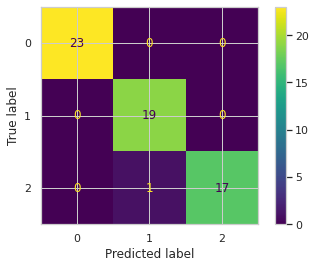

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, x_test, y_test)  
plt.show()